In [18]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
# config to get better plot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['axes.labelcolor'] =  'green' # default green for label
matplotlib.rcParams['axes.linewidth'] =  0.5
from matplotlib import pyplot as plt
import seaborn as sb # add seaborn for pretty plot (vs default one in matplotlib)

In [19]:
# import pytraj
import pytraj as pt

# load sample data
traj = pt.iterload('tz2.nc', 'tz2.parm7')
traj

pytraj.TrajectoryIterator, 101 frames: 
Size: 0.000503 (GB)
<Topology: 223 atoms, 13 residues, 1 mols, non-PBC>
           

In [20]:
# find hbond
hb = pt.hbond(traj)

distance_mask = hb.get_amber_mask()[0]
print('hbond distance mask: {} \n '.format(distance_mask))

angle_mask = hb.get_amber_mask()[1]
print('hbond angle mask: {} \n'.format(angle_mask))

print("hbond data")
print(hb.data) # 1: have hbond; 0: does not have hbond

hbond distance mask: [':1@OG :2@H' ':5@O :3@HG1' ':3@O :1@H3' ..., ':10@O :12@HZ2' ':5@OE2 :6@H'
 ':7@O :9@H'] 
 
hbond angle mask: [':1@OG :2@H :2@N' ':5@O :3@HG1 :3@OG1' ':3@O :1@H3 :1@N' ...,
 ':10@O :12@HZ2 :12@NZ' ':5@OE2 :6@H :6@N' ':7@O :9@H :9@N'] 

hbond data
<pytraj.DatasetList with 14 datasets>
total_solute_hbonds
[0 1 0 ..., 0 0 0]

SER1_OG-TRP2_N-H
[0 1 0 ..., 0 0 0]

GLU5_O-THR3_OG1-HG1
[0 0 0 ..., 0 0 0]
...

GLU5_OE2-ASN6_N-H
[0 0 0 ..., 0 0 0]

GLY7_O-TRP9_N-H
[0 0 0 ..., 0 0 0]


In [21]:
# compute distance between donor-acceptor for ALL frames (also include frames that do not form hbond)
dist = pt.distance(traj, hb.get_amber_mask()[0])
print('all hbond distances: ', dist)

all hbond distances:  [[ 2.1924577   1.92054906  2.35839995 ...,  3.93999355  3.81974987
   4.45726496]
 [ 8.03544864  3.95953378  4.2438701  ...,  6.47548095  4.97960639
   6.47500662]
 [ 4.38455889  3.25022817  3.38755539 ...,  6.45264846  7.37518528
   6.0956301 ]
 ..., 
 [ 6.97851158  9.15141704  8.42936098 ...,  7.2329342   6.74667953
   5.96993506]
 [ 4.40668236  4.33245685  4.49102881 ...,  5.0485394   4.88464996
   6.04310722]
 [ 2.10765322  3.28954633  4.13369896 ...,  2.22195659  3.01349072
   3.48705884]]


In [22]:
angle = pt.angle(traj, hb.get_amber_mask()[1])
angle

array([[ 128.26687651,  140.4319339 ,  130.87185144, ...,   98.56379937,
         107.85608806,   89.34456598],
       [  65.2705368 ,  165.05104503,   81.00468938, ...,   66.48602645,
          84.2725392 ,   78.31224007],
       [ 127.47793034,  153.71941428,  123.90214257, ...,   69.92092063,
          47.03151176,   46.42478935],
       ..., 
       [  24.45322069,   57.47276975,   17.06828405, ...,   50.39660114,
          91.57680164,   86.05409532],
       [ 123.22038163,  124.99010481,  114.02273251, ...,   93.20375796,
         103.8316453 ,   79.2753432 ],
       [ 151.76613517,   87.21904908,   82.82755457, ...,  142.70348966,
         111.75891022,  118.95158863]])

### Plot demo

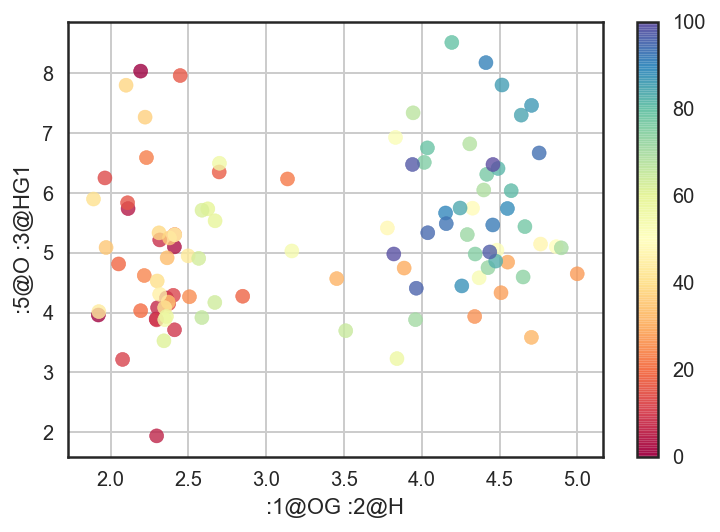

In [25]:
sb.color_palette('deep', n_colors=6, desat=0.5)
sb.set_style(style='white')

# scatter plot for distance between ':1@OG :2@H' and ':5@O :3@HG1'
# the point is colored by frame number (total frame = traj.n_frames (101))
fig = plt.scatter(dist[0], dist[1], marker='o', c=range(traj.n_frames), alpha=0.8, cmap='Spectral')
plt.colorbar()
plt.grid()
plt.xlabel(':1@OG :2@H')
plt.ylabel(':5@O :3@HG1')

# Stats

In [35]:
# Filter frames that form hbond for specific donor-acceptor

# 1st pairs: SER1_OG-TRP2_N-H
h_values = hb.data['SER1_OG-TRP2_N-H'].values # 1: For hbond; 0: not form hbond
print(h_values)

[0 1 0 ..., 0 0 0]


In [36]:
# ':1@OG :2@H' distance
dist[0]

array([ 2.1924577 ,  1.92054906,  2.35839995, ...,  3.93999355,
        3.81974987,  4.45726496])

In [43]:
# filter distances from frames forming hbond
import numpy

h_frames = numpy.where(h_values==1)[0] # frame indices forming hbond
print('h_frames', h_frames)


h_frames [ 1 11 13 15 19 35 41 44]


In [45]:
arr = dist[0][h_frames]
print('hbond distance', arr)

hbond distance [ 1.92054906  2.0764068   1.9627273   2.10848969  2.05082457  1.97018252
  1.88931148  1.92359052]


In [46]:
numpy.mean(arr)

1.9877602413078141

In [47]:
numpy.std(arr)

0.075559413677526596